In [109]:
import pandas as pd

def get_something_to_screenshot():
    data = pd.read_csv("cleaned_data.csv")
    return data

data = get_something_to_screenshot()
print(data.columns)
data = data.drop([2412])
print("here", data.loc[data['FIPS'] == 49031]['sr'])
#data['sr'] = data['sr'].fillna(0)
print(sum(data['sr'] == 'NaN'))
data['rural'] = data['rural'].astype(float)
data['elev'] = data['elev'].astype(float)
data['precip'] = data['precip'].astype(float)
corrs = data.corr()['sr']
corrs = corrs.reindex(corrs.abs().sort_values().index)[::-1]

print(corrs)

Index(['FIPS', 'state', 'area_name', 'rural', 'no_hs', 'hs', 'some_college',
       'college', 'poverty', 'income', 'pop', 'unemp', 'temp', 'precip',
       'elev', 'sr', 'fall_sr', 'winter_sr', 'spring_sr', 'summer_sr',
       'mon_sr', 'tues_sr', 'wed_sr', 'thurs_sr', 'fri_sr', 'sat_sr',
       'sun_sr'],
      dtype='object')
here 2838   NaN
Name: sr, dtype: float64
0
sr              1.000000
thurs_sr        0.841355
sat_sr          0.839785
tues_sr         0.839179
wed_sr          0.827650
mon_sr          0.824521
sun_sr          0.823779
fri_sr          0.814001
summer_sr       0.621822
fall_sr         0.610126
spring_sr       0.555334
winter_sr       0.546250
rural           0.397577
elev            0.345522
income         -0.273117
college        -0.271996
some_college    0.236717
pop            -0.233306
hs              0.211800
temp           -0.196516
precip         -0.163112
unemp           0.132592
poverty         0.129732
FIPS            0.006421
no_hs           0.000676
N

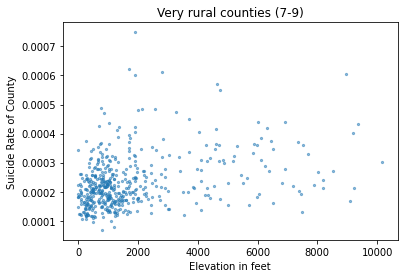

In [31]:
import matplotlib.pyplot as plt

indices = data['rural'].isin([7,8,9])
plt.scatter(data['elev'].loc[indices], data['sr'].loc[indices],s=5,alpha=.5)
plt.xlabel('Elevation in feet')
plt.ylabel('Suicide Rate of County')
plt.title("Very rural counties (7-9)")
plt.show()

In [32]:
indices = data['rural'].isin([4,5,6])
plt.scatter(data['elev'].loc[indices], data['sr'].loc[indices],s=5,alpha=.5)
plt.xlabel('Elevation in feet')
plt.ylabel('Suicide Rate of County')
plt.title("Medium-rural counties (4-6)")
plt.show()

In [14]:
indices = data['rural'].isin([1,2,3])
plt.scatter(data['elev'].loc[indices], data['sr'].loc[indices],s=5,alpha=.5)
plt.xlabel('Elevation in feet')
plt.ylabel('Suicide Rate of County')
plt.title("Urban counties (1-3)")
plt.show()

In [33]:
plt.scatter(data['elev'], data['sr'],s=5,alpha=.5)
plt.xlabel('Elevation in feet')
plt.ylabel('Suicide Rate of County')
plt.title("All counties")
plt.show()

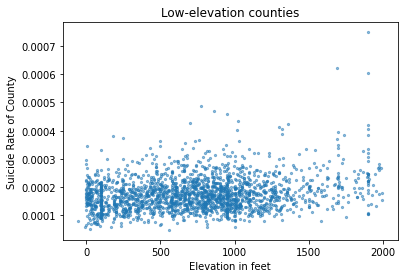

In [34]:
indices = data['elev'] < 2000
plt.scatter(data['elev'].loc[indices], data['sr'].loc[indices],s=5,alpha=.5)
plt.xlabel('Elevation in feet')
plt.ylabel('Suicide Rate of County')
plt.title("Low-elevation counties")
plt.show()

In [35]:
indices = data['elev'] >= 2000
plt.scatter(data['elev'].loc[indices], data['sr'].loc[indices],s=5,alpha=.5)
plt.xlabel('Elevation in feet')
plt.ylabel('Suicide Rate of County')
plt.title("High-elevation counties")
plt.show()

In [36]:
plt.scatter(data['income'], data['sr'],s=5,alpha=.5)
plt.xlabel('Median Income')
plt.ylabel('Suicide Rate of County')
plt.title("All counties")
plt.show()

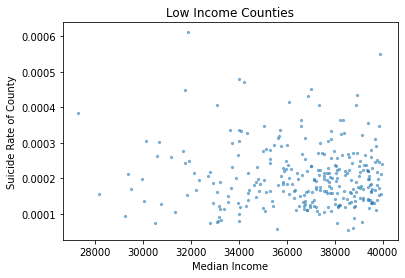

In [39]:
indices = data['income'] < 40000
plt.scatter(data['income'].loc[indices], data['sr'].loc[indices],s=5,alpha=.5)
plt.xlabel('Median Income')
plt.ylabel('Suicide Rate of County')
plt.title("Low Income Counties")
plt.show()

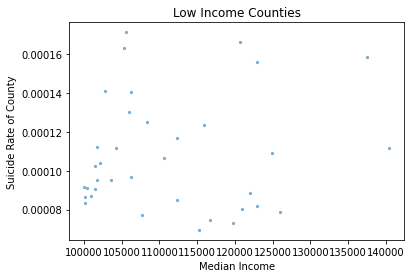

In [47]:
indices = data['income'] > 100000
plt.scatter(data['income'].loc[indices], data['sr'].loc[indices],s=5,alpha=.5)
plt.xlabel('Median Income')
plt.ylabel('Suicide Rate of County')
plt.title("High Income Counties")
plt.show()

In [48]:
data['spring_sr/sr'] = data['spring_sr'] / data['sr']
corrs = data.corr()['spring_sr/sr']
corrs = corrs.reindex(corrs.abs().sort_values().index)[::-1]

print(corrs)

spring_sr/sr    1.000000
spring_sr       0.713268
fall_sr         0.653000
winter_sr       0.636103
summer_sr       0.598275
unemp           0.154300
no_hs           0.124384
rural           0.120913
poverty         0.111428
fri_sr          0.108881
sun_sr          0.108175
wed_sr          0.103512
college        -0.097650
income         -0.096459
elev            0.091715
tues_sr         0.089694
mon_sr          0.078787
sat_sr          0.077176
precip         -0.072259
hs              0.068714
thurs_sr        0.064676
pop            -0.061555
FIPS           -0.055953
sr              0.044441
some_college   -0.018748
temp            0.011009
Name: spring_sr/sr, dtype: float64


[]

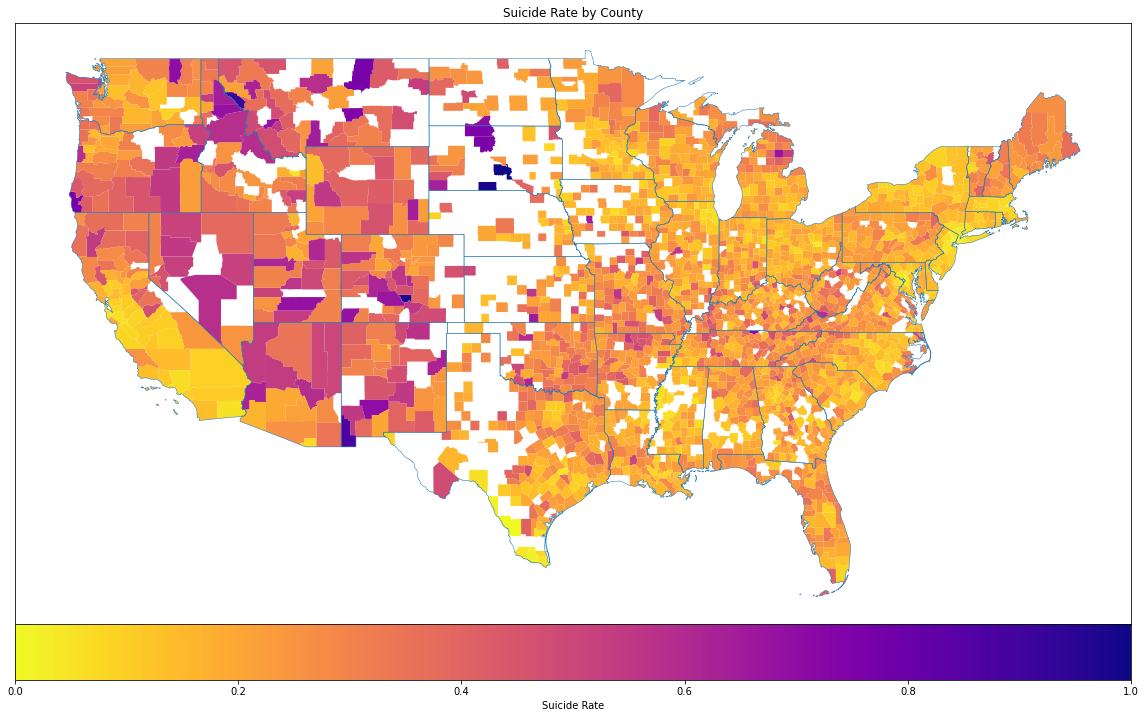

In [100]:
import geopandas as gpd
from geopandas import GeoSeries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
from matplotlib import animation

counties = gpd.read_file('county_data.gpkg')
counties = counties[~counties['STATEFP'].isin(['02', '15', '60', '66', '69', '72', '78'])]
counties['GEOID'] = counties['GEOID'].astype(float)
data = data.merge(counties, left_on="FIPS", right_on="GEOID")
print(data.loc[data['FIPS' == ]])

# Plot
states = counties.dissolve(by = 'STATEFP', aggfunc='sum')
ax = states.boundary.plot(figsize=(20,30), linewidth=0.5)
data = gpd.GeoDataFrame(data, geometry='geometry')
data.plot(column='sr', ax=ax, cmap='plasma_r')
cbar = plt.colorbar(ScalarMappable(cmap='plasma_r'),
                    ax=ax, orientation='horizontal', pad=0, label='Suicide Rate')
ax.set_title("Suicide Rate by County")
ax.set_yticks([])
ax.set_xticks([])
